### Task 1: A) Data Validation and Cleaning

In [26]:
#Importing important libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
#Loading data and inspecting first 10 rows.
data=pd.read_csv(r'C:\USA_cars_datasets.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)
data.head(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [28]:
#I can get rid of the first column since it is the ID. We can use the default indexing
data = data.iloc[: , 1:]

In [29]:
#We do not need Vin and lot columns since they probably have no impact to the price of the vehicle and since we have the state we do not need the country
data.drop(columns=['vin', 'lot','country'], inplace= True)

In [30]:
#Understanding Data
def inspection(df):
    observations = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    df_numeric = df.select_dtypes(include=[np.float64,np.int64])
    minimum = df_numeric.min()
    maximum = df_numeric.max()
    median=df_numeric.median()
    q1=df_numeric.quantile(0.25)
    q3=df_numeric.quantile(0.55)
    unique = df.apply(lambda x: x.unique().shape[0])
    missing_values = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)
    cols = ['types','No of instances', 'min','max','median','25%','75%','unique values', 'missing_values']
    str = pd.concat([types,counts,minimum,maximum,median,q1,q3,unique,missing_values],axis = 1, sort=True)
    str.columns = cols
    str.fillna('-',inplace=True)
    print('_________________\nData types:')
    print(str.types.value_counts())
    print('_________________')
    return str

summary=inspection(data)
display(summary.sort_values(by= 'missing_values',ascending = False))

Data shape: (2499, 9)
_________________
Data types:
object     6
int64      2
float64    1
Name: types, dtype: int64
_________________


,types,No of instances,min,max,median,25%,75%,unique values,missing_values
brand,object,2499,-,-,-,-,-,28,0
color,object,2499,-,-,-,-,-,49,0
condition,object,2499,-,-,-,-,-,47,0
mileage,float64,2499,0.0,1017936.0,35365.0,21466.5,38026.2,2439,0
model,object,2499,-,-,-,-,-,127,0
price,int64,2499,0.0,84900.0,16900.0,10200.0,18500.0,790,0
state,object,2499,-,-,-,-,-,44,0
title_status,object,2499,-,-,-,-,-,2,0
year,int64,2499,1973.0,2020.0,2018.0,2016.0,2018.0,30,0


* Minimum car price is zero. this cannot be true,so we need to replace these values with an appropriate value.
* Maximum car price is $84990.
* The oldest car model was registrated in 1973.
* First quartile value (25%) lies in the year 2016. More than 75% of the cars are new models

In [31]:
#Let's handle some of the categorical variables that can be converted to numerical (i.e title_status, condition)
data['title_status'].replace({'clean vehicle' : 1, 'salvage insurance': 0}, inplace = True)

# converting day,hours into minutes
data['condition'] = data['condition'].str.replace('left','')
data.loc[data['condition'].str.contains('minutes'), 'condition'] = data.loc[data['condition'].str.contains('minutes'), 'condition'].apply(lambda x : str(x).split()[0])
data.loc[data['condition'].str.contains('hours'), 'condition'] = data.loc[data['condition'].str.contains('hours'), 'condition'].apply(lambda x : str(int(str(x).split()[0])*60))
data.loc[data['condition'].str.contains('days'), 'condition'] = data.loc[data['condition'].str.contains('days'), 'condition'].apply(lambda x : str(int(str(x).split()[0])*60*24))
data.loc[data['condition'].str.contains('Listing Expired'), 'condition'] = 0
data['condition'] = data['condition'].astype('int')

In [32]:
data.color.unique()

array(['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange',
       'brown', 'no_color', 'gold', 'charcoal', 'turquoise', 'beige',
       'green', 'dark blue', 'maroon', 'phantom black', 'yellow',
       'color:', 'light blue', 'toreador red', 'bright white clearcoat',
       'billet silver metallic clearcoat', 'black clearcoat',
       'jazz blue pearlcoat', 'purple',
       'ruby red metallic tinted clearcoat', 'triple yellow tri-coat',
       'competition orange', 'off-white', 'shadow black',
       'magnetic metallic', 'ingot silver metallic', 'ruby red',
       'royal crimson metallic tinted clearcoat', 'kona blue metallic',
       'oxford white', 'lightning blue', 'ingot silver',
       'white platinum tri-coat metallic', 'guard',
       'tuxedo black metallic', 'tan', 'burgundy', 'super black',
       'cayenne red', 'morningsky blue', 'pearl white', 'glacier white'],
      dtype=object)

In [15]:
# Percent of Instances of repective colours
data.color.value_counts()/data.shape[0] *100

white                                      28.291317
black                                      20.648259
gray                                       15.806323
silver                                     12.004802
red                                         7.683073
blue                                        6.042417
no_color                                    2.440976
green                                       0.960384
orange                                      0.800320
gold                                        0.760304
charcoal                                    0.720288
brown                                       0.600240
yellow                                      0.360144
magnetic metallic                           0.240096
color:                                      0.200080
beige                                       0.200080
shadow black                                0.200080
oxford white                                0.160064
ingot silver metallic                       0.

First 7 colours take more than 90% of the total cars, so i will name the rest as "other"

In [33]:
# Replacing colors having % of total count < 1%

colors_few_instances = data.color.value_counts()[data['color'].value_counts() < 10].index
colors_few_instances
data['color'].replace(colors_few_instances, 'other', inplace= True)

Let's have a look at the models for any inconsistencies

In [34]:
data.model.unique()

array(['cruiser', 'se', 'mpv', 'door', '1500', 'pk', 'malibu', 'coupe',
       'wagon', 'forte', 'encore', 'sorento', 'doors', 'chassis', 'q70',
       'camaro', 'convertible', 'vans', 'srw', 'compass', 'enclave',
       '300', 'cherokee', 'pacifica', 'x3', 'equinox', 'challenger', 'm',
       'colorado', 'focus', 'durango', 'escape', 'charger', 'explorer',
       'f-150', '3500', 'caravan', 'van', 'dart', '2500', 'esv',
       'cutaway', 'el', 'edge', 'series', 'flex', 'srx', 'cab', 'pickup',
       'vehicl', 'trax', 'tahoe', 'suburban', 'cargo', 'drw', 'fiesta',
       'impala', 'soul', 'elantra', 'pioneer', 'trail', 'traverse',
       'country', 'sundance', 'road/street', 'nautilus', 'gx', 'q5',
       'gle', 'sportage', '5', 'sport', 'discovery', 'acadia', 'ghibli',
       'glc', 'e-class', 'truck', 'utility', 'limited', 'sl-class',
       'cx-3', '2500hd', 'sonic', 'corvette', 'mdx', 'xt5', 'fusion',
       'mustang', 'passenger', 'volt', 'spark', 'cruze', 'ld', 'journey',
       

There are two examples like van-vans, door- doors that need to be changed for consistency

In [35]:
data['model'].replace('doors', 'door', inplace = True)
data['model'].replace('vans', 'van', inplace = True)

***Handling anomalies***

In [36]:
#Replace 0s with the median of prices based on the brand
median=data.groupby('brand')['price'].median()
def fill_median(cols):
    price=cols[0]
    brand=cols[1]
    if price==0:
        return median[brand]
    else:
        return price

In [37]:
data['price']=data[['price','brand']].apply(fill_median,axis=1)

In [38]:
data.mileage.value_counts().sort_index().head(10)

0.0       6
1.0      11
7.0       1
71.0      1
122.0     1
174.0     1
179.0     1
264.0     1
363.0     1
401.0     1
Name: mileage, dtype: int64

In [43]:
#There are also used vehicles with 0 or 1 or 7 mileage. That's also uncommon.
print(data[data['mileage']<50])

#Keep vehicles with mileage>0(7 in our case)
data=data[data.mileage>7]


Empty DataFrame
Columns: [price, brand, model, year, title_status, mileage, color, state, condition]
Index: []


What is a salvage title?
A salvage title is given when a vehicle is no longer drivable. It most likely was in an accident and was deemed a total loss by the insurance company. The insurance provider paid the value of the vehicle and it was taken to a salvage company.

A salvage title means the vehicle is not safe to be driven and in most states, it is illegal to drive. The vehicle can’t be registered or insured. It also has very little resale value, and it is still damaged. In addition, a car with a damaged odometer or one that has been tampered with may be considered salvage. Hail, flood and fire damage can all result in a vehicle being given a salvage title.

In some places, individuals aren’t allowed to buy a vehicle with a salvage title. Only repair companies or car dealerships can purchase salvage cars.

REFERENCE:https://www.autoblog.com/2015/11/27/what-is-the-difference-between-a-clean-title-and-a-salvage-title/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAACzVPJonqnU0IbyiBqhcuczWr_S8xfDG6yZ03f02Tcif1jwVwgtI2xC5zSFraMhOjrwB4yFtNUrSU0RDL2E0T8-ITKO72hC_z2Te12ztMFgaVGjHYBVjRQMTJhq-RP4pZCKIxO550MiHnyW8VPB-VRjth-o2KE78yZiDeuUOrPTI

In [44]:
#There are cases observed where price is low for a car. That can be explained from the fact that these are "salvage insurance". Hence, these are outliers but can be explained
data[data.price<900]

,price,brand,model,year,title_status,mileage,color,state,condition
188,175.0,chrysler,door,2000,0,231240.0,red,north carolina,4320
206,25.0,chevrolet,vehicl,2020,0,7232.0,black,kentucky,4320
209,25.0,chrysler,door,2005,0,151815.0,silver,massachusetts,4320
284,25.0,dodge,door,2007,0,160528.0,other,minnesota,1020
294,725.0,ford,door,2017,0,67279.0,gray,virginia,2880
301,50.0,chevrolet,door,2008,0,172102.0,blue,texas,1080
302,720.0,ford,wagon,2006,1,26914.0,no_color,florida,1380
319,25.0,chevrolet,pickup,2010,0,149189.0,white,colorado,1080
327,25.0,chevrolet,door,2011,0,105244.0,white,colorado,1080
335,225.0,chevrolet,door,2014,0,87673.0,red,colorado,1080


In [45]:
data.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,price,year,title_status,mileage,condition
count,2481.0,2481.0,2481.0,2481.0,2481.0
mean,19148.0,2016.7,0.9,52678.1,3279.9
std,11867.1,3.4,0.2,59754.7,3667.3
min,25.0,1973.0,0.0,71.0,0.0
25%,10800.0,2016.0,1.0,21976.0,1260.0
50%,17150.0,2018.0,1.0,35595.0,2880.0
75%,25700.0,2019.0,1.0,64111.0,2880.0
max,84900.0,2020.0,1.0,1017936.0,21600.0


***Examination of relationships between the features and the target variable***

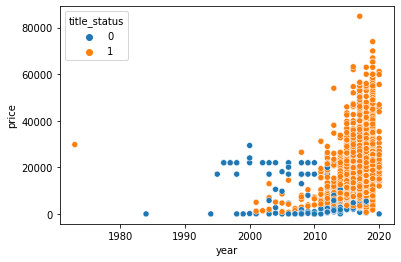

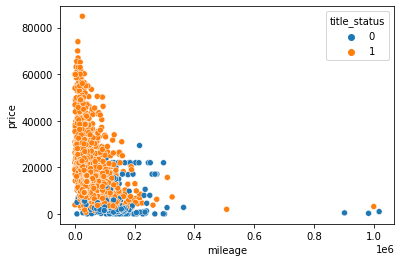

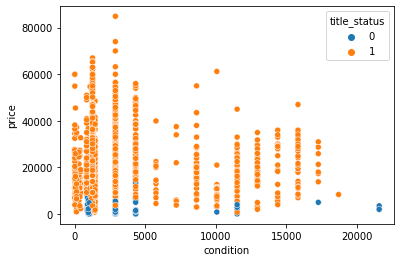

In [46]:
# Plotting scatter plot for each predictor vs the target variable(price)
continuous_predictors=['year','mileage','condition']

for predictor in continuous_predictors:
    sns.scatterplot(data=data,x=predictor, y='price',hue='title_status')
    plt.show()

* It is obvious that the more recent the car's registration year, the higher the price, that the lesser the mileage the higher the price and that the title_status( If it's driveable or not) plays an important role in the price of the car.

* Also a week relationship between condition and price appears.

* Some more anomalies appeared(i.e. 4 instances of numbers higher than 900K in mileage
As shown below, the 3 of them are trucks(travel a lot) and one that is not. Hence, I am going to keep them.

**Relationships can be also shown with a correlation matrix between numerical variables and the target variable**

<AxesSubplot:>

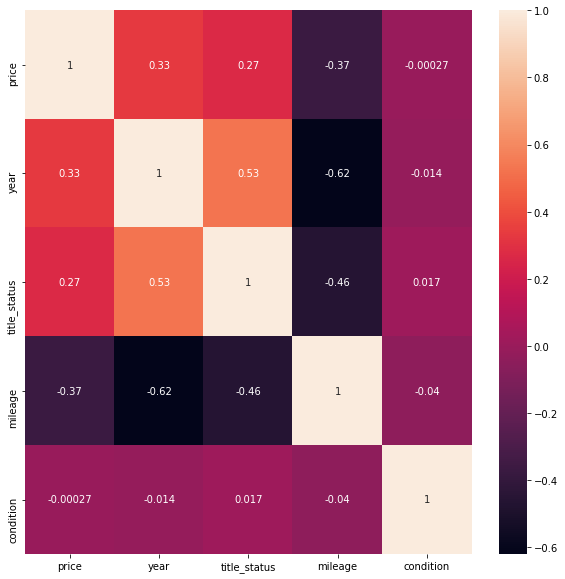

In [47]:
#Continuous variables vs Price
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),annot=True)

Year,title_status and mileage have moderate correlation with price
* year & title_status:  moderate positive correlation
* mileage: moderate negative correlation

These findings are rational since the more recent(higher year number) the higher the price.

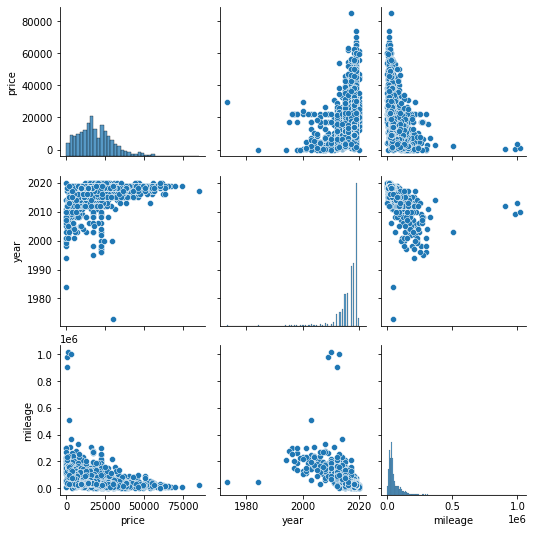

In [48]:
#That can also be observed through these scatterplots.
import seaborn as sns
import matplotlib.pyplot as plt
df=data[['price','year','mileage']]

sns.pairplot(df, kind="scatter")
plt.show()

# **Relationships of Categorical variables with price: I am going to use ANOVA to achieve that**

**Null hypothesis(H0): The variables are not correlated with each other**
* P-value: The probability of Null hypothesis being true
* Accept Null hypothesis if P-value>0.05. Means variables are NOT correlated
* Reject Null hypothesis if P-value<0.05. Means variables are correlated

In [ ]:
'''
Categorical variables vs Price
To check if a continuous target variable is affected by categorical features, we can do an ANOVA test.
'''
#Categorical features relationship with price---ANOVA
#function to find the statistical relationship with all the categorical variables
def Anova(data, target, categorical_feats):
    from scipy.stats import f_oneway

    # empty list of final selected predictors
    feats_correlated_with_price=[]
    
    print('##### ANOVA Results ##### \n')
    for feature in categorical_feats:
        CategoryGroupLists=data.groupby(feature)[target].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(feature, 'is correlated with', target, '| P-Value:', AnovaResults[1])
            feats_correlated_with_price.append(feature)
        else:
            print(feature, 'is NOT correlated with', target, '| P-Value:', AnovaResults[1])
    
    return(feats_correlated_with_price)



In [ ]:
categorical_feats=['brand','model','color','state']
Anova(data=data, 
              target='price', 
              categorical_feats=categorical_feats)

According to the ANOVA test all categorical variables affect the price.